In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras as kr
import sklearn
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import itertools
import warnings
warnings.filterwarnings('ignore')



In [52]:
df= pd.read_csv("C:/Users/Nikita Ayu/BMKG/ensoo.csv", sep=";")
df.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1950,-1.53,-1.34,-1.16,-1.18,-1.07,-0.85,-0.54,-0.42,-0.39,-0.44,-0.60,-0.80
1,1951,-0.82,-0.54,-0.17,0.18,0.36,0.58,0.70,0.89,0.99,1.15,1.04,0.81
2,1952,0.53,0.37,0.34,0.29,0.20,0.00,-0.08,0.00,0.15,0.10,0.04,0.15
3,1953,0.40,0.60,0.63,0.66,0.75,0.77,0.75,0.73,0.78,0.84,0.84,0.81
4,1954,0.76,0.47,-0.05,-0.41,-0.54,-0.50,-0.64,-0.84,-0.90,-0.77,-0.73,-0.66


In [53]:
df.set_index('Year', inplace = True)
df.head()

,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
1950,-1.53,-1.34,-1.16,-1.18,-1.07,-0.85,-0.54,-0.42,-0.39,-0.44,-0.60,-0.80
1951,-0.82,-0.54,-0.17,0.18,0.36,0.58,0.70,0.89,0.99,1.15,1.04,0.81
1952,0.53,0.37,0.34,0.29,0.20,0.00,-0.08,0.00,0.15,0.10,0.04,0.15
1953,0.40,0.60,0.63,0.66,0.75,0.77,0.75,0.73,0.78,0.84,0.84,0.81
1954,0.76,0.47,-0.05,-0.41,-0.54,-0.50,-0.64,-0.84,-0.90,-0.77,-0.73,-0.66


In [54]:
df.isnull().sum()

January      0
February     0
March        0
April        0
May          0
June         0
July         0
August       0
September    0
October      0
November     0
December     0
dtype: int64

In [55]:
data1 = df.transpose()
data1

Year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
January,-1.53,-0.82,0.53,0.40,0.76,-0.68,-1.11,-0.25,1.81,0.61,...,-0.42,0.55,2.48,-0.34,-0.92,0.75,0.50,-1.05,-0.97,-0.67
February,-1.34,-0.54,0.37,0.60,0.47,-0.62,-0.76,0.06,1.66,0.62,...,-0.46,0.47,2.14,-0.16,-0.85,0.72,0.48,-0.93,-0.93,-0.43
March,-1.16,-0.17,0.34,0.63,-0.05,-0.69,-0.63,0.41,1.27,0.52,...,-0.27,0.53,1.58,0.05,-0.70,0.71,0.40,-0.84,-0.99,-0.14
April,-1.18,0.18,0.29,0.66,-0.41,-0.80,-0.54,0.72,0.93,0.33,...,0.04,0.70,0.94,0.20,-0.50,0.66,0.19,-0.66,-1.06,0.16
May,-1.07,0.36,0.20,0.75,-0.54,-0.79,-0.52,0.92,0.74,0.20,...,0.21,0.93,0.39,0.30,-0.22,0.54,-0.08,-0.48,-0.99,0.48
June,-0.85,0.58,0.00,0.77,-0.50,-0.72,-0.51,1.11,0.64,-0.07,...,0.16,1.18,-0.07,0.31,-0.01,0.45,-0.30,-0.38,-0.85,0.77
July,-0.54,0.70,-0.08,0.75,-0.64,-0.68,-0.57,1.25,0.57,-0.18,...,0.05,1.52,-0.36,0.14,0.09,0.28,-0.41,-0.40,-0.81,1.07
August,-0.42,0.89,0.00,0.73,-0.84,-0.75,-0.55,1.32,0.43,-0.28,...,0.07,1.86,-0.54,-0.11,0.23,0.14,-0.57,-0.49,-0.91,1.32
September,-0.39,0.99,0.15,0.78,-0.90,-1.09,-0.46,1.33,0.39,-0.09,...,0.23,2.16,-0.63,-0.38,0.49,0.19,-0.89,-0.67,-1.01,0.00
October,-0.44,1.15,0.10,0.84,-0.77,-1.42,-0.42,1.39,0.44,-0.03,...,0.49,2.42,-0.69,-0.65,0.76,0.35,-1.17,-0.81,-0.99,0.00


In [57]:
dates = pd.date_range(start = '1950-01', freq = 'MS', periods = len(data1.columns)*12)
dates

DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', length=888, freq='MS')

In [59]:
data_np = data1.transpose().to_numpy()
shape = data_np.shape
data_np

array([[-1.53, -1.34, -1.16, -1.18, -1.07, -0.85, -0.54, -0.42, -0.39,
        -0.44, -0.6 , -0.8 ],
       [-0.82, -0.54, -0.17,  0.18,  0.36,  0.58,  0.7 ,  0.89,  0.99,
         1.15,  1.04,  0.81],
       [ 0.53,  0.37,  0.34,  0.29,  0.2 ,  0.  , -0.08,  0.  ,  0.15,
         0.1 ,  0.04,  0.15],
       [ 0.4 ,  0.6 ,  0.63,  0.66,  0.75,  0.77,  0.75,  0.73,  0.78,
         0.84,  0.84,  0.81],
       [ 0.76,  0.47, -0.05, -0.41, -0.54, -0.5 , -0.64, -0.84, -0.9 ,
        -0.77, -0.73, -0.66],
       [-0.68, -0.62, -0.69, -0.8 , -0.79, -0.72, -0.68, -0.75, -1.09,
        -1.42, -1.67, -1.47],
       [-1.11, -0.76, -0.63, -0.54, -0.52, -0.51, -0.57, -0.55, -0.46,
        -0.42, -0.43, -0.43],
       [-0.25,  0.06,  0.41,  0.72,  0.92,  1.11,  1.25,  1.32,  1.33,
         1.39,  1.53,  1.74],
       [ 1.81,  1.66,  1.27,  0.93,  0.74,  0.64,  0.57,  0.43,  0.39,
         0.44,  0.5 ,  0.61],
       [ 0.61,  0.62,  0.52,  0.33,  0.2 , -0.07, -0.18, -0.28, -0.09,
        -0.03,  0.05

In [60]:
data_np = data_np.reshape((shape[0] * shape[1], 1))
data_np.shape

(888, 1)

In [61]:
df = pd.DataFrame({'Mean' : data_np[:,0]})
df.set_index(dates, inplace = True)
df.head()

,Mean
1950-01-01,-1.53
1950-02-01,-1.34
1950-03-01,-1.16
1950-04-01,-1.18
1950-05-01,-1.07


Text(0, 0.5, 'Mean across Month')

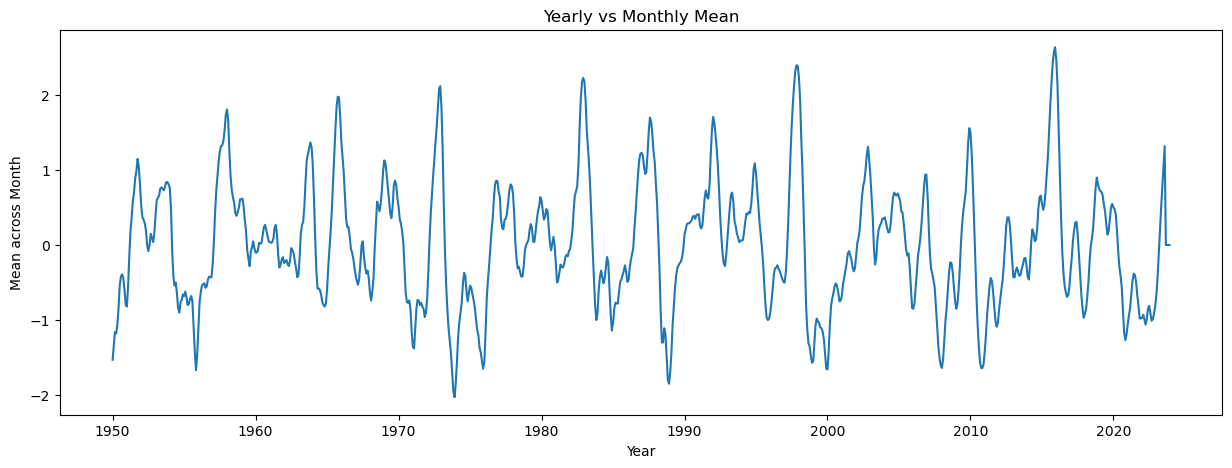

In [62]:
plt.figure(figsize = (15,5))
plt.plot(df.index, df['Mean'])
plt.title('Yearly vs Monthly Mean')
plt.xlabel('Year')
plt.ylabel('Mean across Month')

In [63]:
dataset = df.values
dataset.shape

(888, 1)

In [64]:
train = dataset[0:696,:]
test = dataset[696:,:]

In [65]:
print("Original data shape:",dataset.shape)
print("Train shape:",train.shape)
print("Test shape:",test.shape)

Original data shape: (888, 1)
Train shape: (696, 1)
Test shape: (192, 1)


In [66]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data.shape

(888, 1)

In [67]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [68]:
x_train.shape

(636, 60)

In [69]:
y_train.shape

(636,)

In [70]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(636, 60, 1)

In [71]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(units = 50))
model.add(Dense(1))

In [72]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(x_train, y_train, epochs=10, batch_size = 1, verbose = 2)

Epoch 1/10
636/636 - 29s - loss: 0.0133 - 29s/epoch - 45ms/step
Epoch 2/10
636/636 - 17s - loss: 0.0039 - 17s/epoch - 26ms/step
Epoch 3/10
636/636 - 17s - loss: 0.0022 - 17s/epoch - 26ms/step
Epoch 4/10
636/636 - 17s - loss: 0.0011 - 17s/epoch - 26ms/step
Epoch 5/10
636/636 - 16s - loss: 7.2237e-04 - 16s/epoch - 26ms/step
Epoch 6/10
636/636 - 18s - loss: 7.2910e-04 - 18s/epoch - 28ms/step
Epoch 7/10
636/636 - 17s - loss: 6.1567e-04 - 17s/epoch - 27ms/step
Epoch 8/10
636/636 - 17s - loss: 6.0103e-04 - 17s/epoch - 26ms/step
Epoch 9/10
636/636 - 17s - loss: 5.5470e-04 - 17s/epoch - 26ms/step
Epoch 10/10
636/636 - 17s - loss: 5.5070e-04 - 17s/epoch - 27ms/step


In [73]:
inputs = df[len(df) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [74]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [75]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
Mean = model.predict(X_test)
Mean1 = scaler.inverse_transform(Mean)

6/6 [==============================] - 3s 40ms/step


In [76]:
rms=np.sqrt(np.mean(np.power((test-Mean1),2)))
rms

0.2271911972936076

Text(0.5, 1.0, 'Forecasting on Actual data')

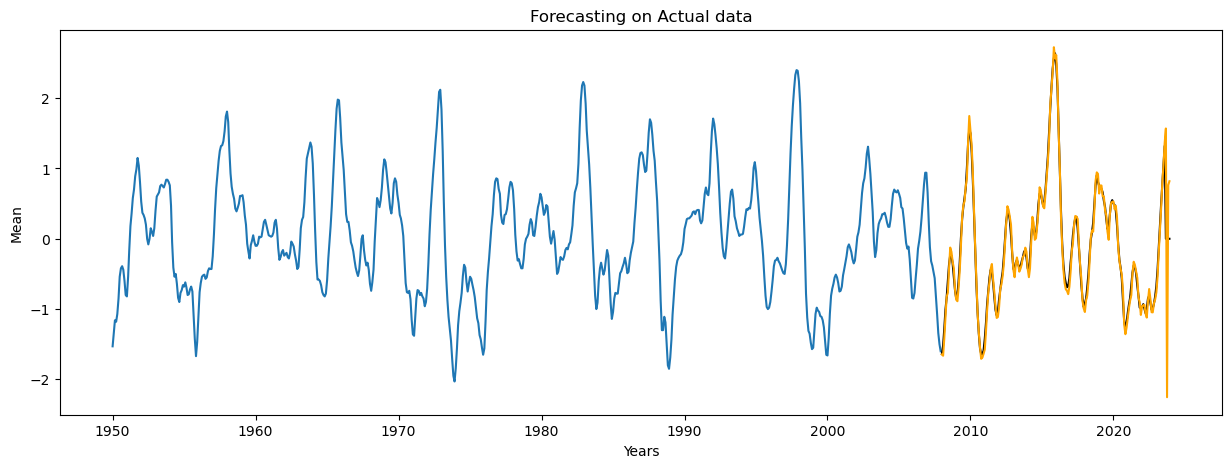

In [77]:
train = df[:696]
test = df[696:]
test['Predictions'] = Mean1

plt.figure(figsize=(15,5))
plt.plot(train['Mean'])
plt.plot(test['Mean'], color = 'black')
plt.plot(test['Predictions'], color = 'orange')
plt.xlabel('Years')
plt.ylabel('Mean')
plt.title('Forecasting on Actual data')

In [78]:
trainpred = model.predict(X_test,steps=2)

2/2 [==============================] - 2s 77ms/step


In [79]:
trainpred.shape

(192, 1)

In [80]:
pred = scaler.inverse_transform(trainpred)

In [81]:
pred[0:24] 

array([[-1.6465802 ],
       [-1.6635817 ],
       [-1.4284145 ],
       [-1.113243  ],
       [-0.8269015 ],
       [-0.76859486],
       [-0.43527356],
       [-0.1253323 ],
       [-0.18580464],
       [-0.32373807],
       [-0.41881827],
       [-0.71806043],
       [-0.86687136],
       [-0.88831663],
       [-0.7043257 ],
       [-0.45132774],
       [-0.10708496],
       [ 0.30626875],
       [ 0.46880642],
       [ 0.53384626],
       [ 0.73857486],
       [ 0.86234343],
       [ 1.3805809 ],
       [ 1.7467126 ]], dtype=float32)

In [82]:
test.head()

,Mean,Predictions
2008-01-01,-1.64,-1.646580
2008-02-01,-1.52,-1.663582
2008-03-01,-1.29,-1.428414
2008-04-01,-1.01,-1.113243
2008-05-01,-0.84,-0.826901


In [85]:
testScore = math.sqrt(mean_squared_error(test['Mean'][:120], trainpred[:120, 0])) * 100
print('Accuracy Score: %.2f' % (testScore))

Accuracy Score: 86.94


In [1]:
step_yr = 2023
yr = int(input('Enter the Year to Predict:'))
c = yr - step_yr
e = c-1
b = pred[120+(e*12) : 120+(e*12)+12].mean(axis=0)

In [ ]:
print(b)
if b >= 0.5 and b <= 0.9:
    print(yr, 'is Weak El-Nino')
elif b >= 1.0 and b <= 1.4:
    print('It is Moderate El-Nino')
elif b >= 1.5 and b <= 1.9:
    print(yr, 'is Strong El-Nino')
elif b >= 2:
    print(yr, 'is Very Strong El-Nino')
elif b <=-0.5 and b >= -0.9:
    print(yr, 'is Weak La-Nina')
elif b <= -1 and b >= -1.4:
    print(yr, 'is Moderate La-Nina')
elif b <= -1.5:
    print(yr, 'is Strong La-Nina')
else:
    print(yr, 'is a Moderate Year')

In [ ]:
dates1 = pd.date_range(start = '2008-01', freq = 'MS', end = '2027-12')
dates1

In [ ]:
new_df = pd.DataFrame({'Predicted_values':pred[:,0]})

In [ ]:
new_df.set_index(dates1, inplace = True)

In [ ]:
new_df.head()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(train['Mean'])
plt.plot(test['Mean'], color = 'black')
plt.plot(test['Predictions'], color = 'orange')
plt.plot(new_df['Predicted_values'][120:], color = 'red')
plt.xlabel('Years')
plt.ylabel('Mean')
plt.legend(loc = True)
plt.title('Forecasting on Actual data')